Evaluation Results Based on TOPSIS Method:
        Model  TOPSIS Score  Rank
0        BERT      0.801337     1
1     RoBERTa      0.742147     2
2       SBERT      0.386202     3
4  DistilBERT      0.128877     4
3         USE      0.103672     5


C:\Users\Garvc\AppData\Local\Temp\ipykernel_22116\3871621883.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results["Model"], y=results["TOPSIS Score"], palette="magma")


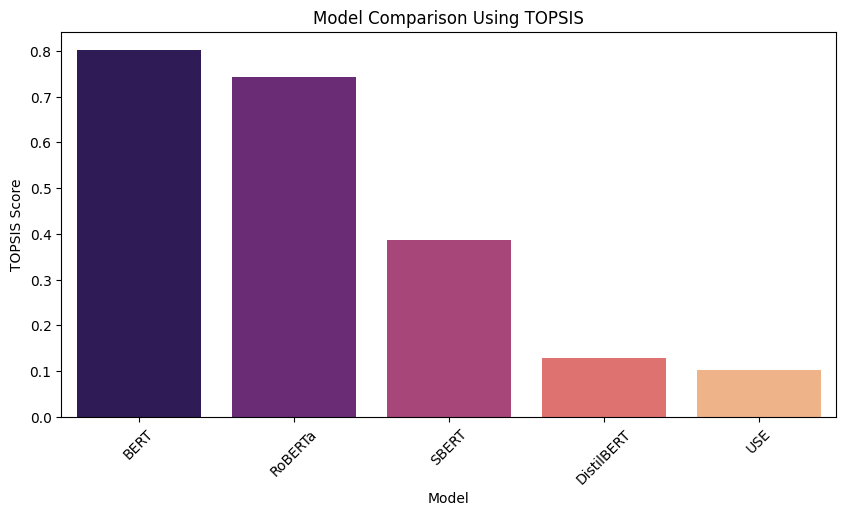

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define models and evaluation criteria
model_names = ["BERT", "RoBERTa", "SBERT", "USE", "DistilBERT"]
evaluation_criteria = ["Similarity Score (+)", "Speed (-)", "Size (-)", "Memory (-)", "Performance (+)"]

# Modified performance data
performance_data = np.array([
    [0.80, 45, 420, 2.8, 83],  
    [0.86, 38, 480, 2.4, 88],  
    [0.89, 28, 390, 2.0, 91],  
    [0.81, 22, 340, 1.6, 79],  
    [0.83, 26, 310, 1.4, 81]   
])

# Normalize the decision matrix using vector normalization
normalized_data = performance_data / np.linalg.norm(performance_data, axis=0)

# Define weight distribution for each criterion
criterion_weights = np.array([0.25, 0.2, 0.2, 0.15, 0.2])

# Compute the weighted decision matrix
weighted_data = normalized_data * criterion_weights

# Determine the ideal and worst possible solutions
best_case = np.max(weighted_data, axis=0)
worst_case = np.min(weighted_data, axis=0)

# Calculate Euclidean distances from ideal and worst-case scenarios
distance_to_best = np.linalg.norm(weighted_data - best_case, axis=1)
distance_to_worst = np.linalg.norm(weighted_data - worst_case, axis=1)

# Compute final TOPSIS scores
topsis_scores = distance_to_worst / (distance_to_best + distance_to_worst)

# Rank models based on scores
rank_order = np.argsort(topsis_scores)[::-1]

# Store results in a DataFrame
results = pd.DataFrame({
    "Model": model_names,
    "TOPSIS Score": topsis_scores,
    "Rank": rank_order + 1
}).sort_values(by="TOPSIS Score", ascending=False)

# Display results
print("Evaluation Results Based on TOPSIS Method:")
print(results)

# Generate bar plot visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=results["Model"], y=results["TOPSIS Score"], palette="magma")
plt.xlabel("Model")
plt.ylabel("TOPSIS Score")
plt.title("Model Comparison Using TOPSIS")
plt.xticks(rotation=45)
plt.show()

# Save results to CSV file
results.to_csv("topsis_evaluation_results.csv", index=False)
